## **IMPORTING LIBRARIES :**

# **FINAL YEAR PROJECT : BANK LOAN APPROVAL PREDICTION SYSTEM USING MACHINE LEARNING ALGORITHMS**

## **GROUP PARTICIPANTS:-**
1. JAYAN KOKRU
2. PRATHMESH CHAVAN
3. ABHIJEET GHODKE
4. SIDDHARTH CHAND

## **GUIDED BY :-**
PROF. SAGAR MANE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## **IMPORTING DATASETS :**

In [4]:
data = pd.read_csv('/content/train_pro.csv')

## Print first few(here,5) rows :

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Print information about the Dataset:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


***seaborn.countplot() or sb.countplot() method is used to show the counts of observations in each categorical bin using bars. ***

### *For Gender*

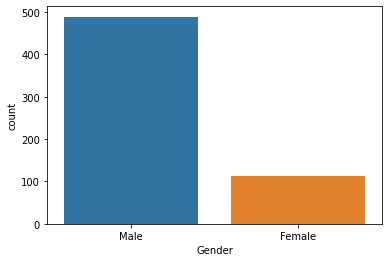

In [6]:
sb.countplot(data=data, x='Gender')

### *For  Married*

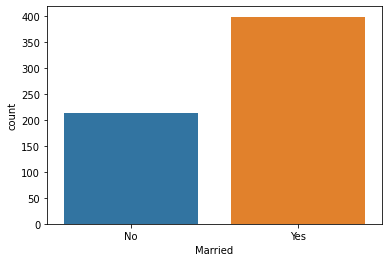

In [7]:
sb.countplot(data=data, x='Married')

### *For Dependent*

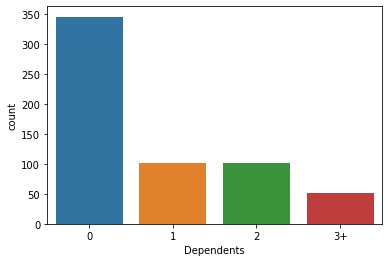

In [8]:
sb.countplot(data=data, x='Dependents')

### *For Self Employed*

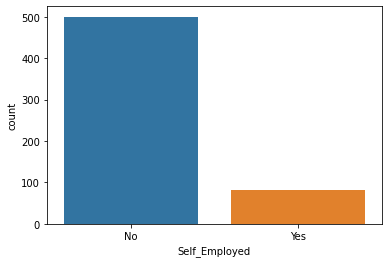

In [9]:
sb.countplot(data=data, x='Self_Employed')

### displot is an upgraded version of distplot() function. It is used to plot the distplot which represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. 
### It shows a histogram with a line on it.

### *For Applicant Income*

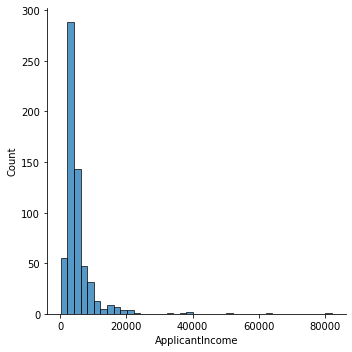

In [10]:
sb.displot(data=data, x='ApplicantIncome', binwidth=2000)

### *For Loan Amount*

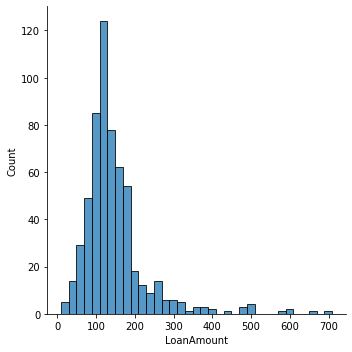

In [11]:
sb.displot(data=data, x='LoanAmount', binwidth=20)

### *For Loan Amount Term*

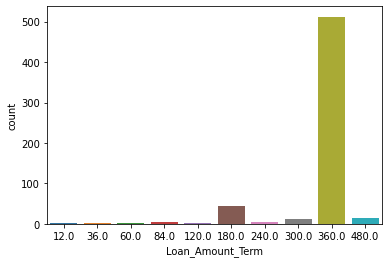

In [12]:
sb.countplot(data=data, x='Loan_Amount_Term')


## *For Credit History*

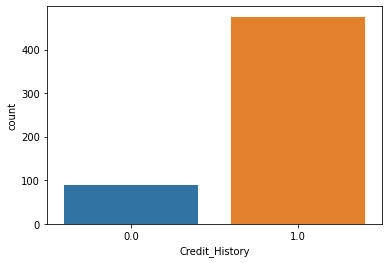

In [13]:
sb.countplot(data=data, x='Credit_History')

### Removing the Loan ID

In [14]:
data.drop('Loan_ID', axis=1, inplace=True)

### Detect missing values

In [15]:
data.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

### Replace Null values in dataset

In [16]:
data.fillna({
    'Credit_History': data.Credit_History.mode()[0],
    'Self_Employed': data.Dependents.mode()[0],
    'LoanAmount': data.LoanAmount.median(),
    'Dependents': data.Dependents.mode()[0],
    'Loan_Amount_Term': data.Loan_Amount_Term.mode()[0],
    'Gender': data.Gender.mode()[0],
    'Married': data.Married.mode()[0]
}, inplace=True)

### **ENCODING**

Encode target labels with value between 0 and n_classes-1

In [17]:
from sklearn.preprocessing import LabelEncoder

gender_le = LabelEncoder()
data.Gender = gender_le.fit_transform(data.Gender)
married_le = LabelEncoder()
data.Married = married_le.fit_transform(data.Married)
dependents_le = LabelEncoder()
data.Dependents = dependents_le.fit_transform(data.Dependents)
education_le = LabelEncoder()
data.Education = education_le.fit_transform(data.Education)
self_employed_le = LabelEncoder()
data.Self_Employed = self_employed_le.fit_transform(data.Self_Employed)
property_area_le = LabelEncoder()
data.Property_Area = property_area_le.fit_transform(data.Property_Area)
loan_status_le = LabelEncoder()
data.Loan_Status = loan_status_le.fit_transform(data.Loan_Status)

### Now, print the new first few rows:

In [18]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


In [19]:
X = data.drop(columns=['Loan_Status'], axis=1)
y = data['Loan_Status']

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

The cross_val_score() function will be used to perform the evaluation, taking the dataset and cross-validation configuration and returning a list of scores calculated for each fold

## **Cross Validation : It is done  for better validation of the model**

### For Example: In cv-5, train-4, test-1

In [30]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)


A random forest classifier is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 74.19354838709677
Cross validation is 78.82846861255499


 SVC (Support Vector Classifier) used to fit the data provided, returning a "best fit" hyperplane that divides, or categorizes, the data.

In [32]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
classify(model, X, y)

Accuracy is 66.12903225806451
Cross validation is 69.05504464880714


KNeighborsClassifier implementing the k-nearest neighbors vote, implements learning based on the k nearest neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

## *A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.*

In [34]:
from sklearn.metrics import classification_report
pred=model.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.10      0.29      0.14         7
           1       0.88      0.65      0.75        55

    accuracy                           0.61        62
   macro avg       0.49      0.47      0.45        62
weighted avg       0.79      0.61      0.68        62

